In [1]:
import numpy as np

In [2]:
class Simplicial_Complex:
    def __init__(self, simplices):
        self.simplices = simplices

In [3]:
class Simplex:
    def __init__(self, vertices):
        self.vertices = vertices
        self.dim = len(vertices)-1
        
    #def __add__(self, rhs):
        # use add_simplex
        # use add_chain
    
    def __eq__(self,rhs):
        if self and rhs:
            return self.vertices == rhs.vertices
        else:
            return False
        
    def __str__(self):
        return f"Simplex({self.vertices})"
    
    def __repr__(self):
        return f"Simplex({self.vertices})"
    
    def boundary(self): # input is n-simplex and output is (n-1)-chain
        n = len(self.vertices)
        simplices = [Simplex(self.vertices[:i] + self.vertices[i+1:]) for i in range(n)]
        coefficients = [(-1)**i for i in range(n)]
        #return simplices  # making sure output is correct, but it wasn't; simplices was list of lists of lists; error
        #return coefficients
        return Chain(simplices,coefficients)

In [4]:
class Chain:
    # should be taking in Simplex types
    def __init__(self, simplices, coefficients): # simplices are of same dimension
        if len(simplices) == 1:
            pass
        else:
            length = len(simplices[0].vertices)
            for lst in simplices[1:]:
                if len(lst.vertices) != length:
                    raise TypeError("Simplices must be of same dimension.")


        distinct_simplices = []
        for simplex in simplices:
            if simplex not in distinct_simplices:
                distinct_simplices.append(simplex)


        coef = [0 for i in range(len(distinct_simplices))]
        for i in range(len(distinct_simplices)):
            simplex = distinct_simplices[i]
            for j in range(len(simplices)):
                if simplices[j] == simplex:
                    coef[i] += coefficients[j]
        self.simplices = distinct_simplices
        self.coefficients = coef
        
    def __str__(self):
        return f"Chain({self.simplices}, {self.coefficients})"
    
    def __repr__(self):
        return f"Simplex({self.vertices})"
    
        
    def add_chain(self, other): # same dim  # also make it so you add a simplex not just a list of vertices
        if len(self.simplices[0].vertices) != len(rhs.simplices[0].vertices): 
            raise TypeError("Chains must be of same dimension.")
        else:
            total_simplices = self.simplices + other.simplices
            total_coefficients = self.coefficients + other.coefficients
            temp_chain = Chain(total_simplices, total_coefficients)
            self.simplices = temp_chain.simplices
            self.coefficients = temp_chain.coefficients
            
    def boundary(self):
        total_simplices = []
        total_coefficients = []
        for i in range(len(self.simplices)):
            simplex = self.simplices[i]
            temp_simplices = simplex.boundary().simplices
            for x in range(len(temp_simplices)):
                total_simplices.append(temp_simplices[x])
            temp_coef = simplex.boundary().coefficients
            new_coef = [self.coefficients[i] * temp_coef[j] for j in range(len(temp_coef))]
            for c in range(len(new_coef)):
                total_coefficients.append(new_coef[c])
        new_chain = Chain(total_simplices, total_coefficients)
        return new_chain
    

In [5]:
class BoundaryMap:
    def __init__(self,sc,n):
        # will look through all the simplices, check n-simplices where n is num of vertices
        d_basis = []
        cd_basis = []
        # store those in list called domain-basis
        for i in range(len(sc.simplices)):
            if sc.simplices[i].dim == n:      #2-simplex has 2 vertices, but 1 dimensional, so dim + 1 gives # vertices
                d_basis.append(sc.simplices[i])
        # and repeat for the n-1 simplices
        for i in range(len(sc.simplices)):
            if sc.simplices[i].dim == n-1:
                cd_basis.append(sc.simplices[i])
        # initialize matrix (or vector) which will contain columns vectors, may be rows at first, so prepare for transposing matrix
        if len(d_basis) == 0:
            mat = np.zeros((len(cd_basis),1))
            self.map = mat
        elif len(cd_basis) == 0:
            mat = np.zeros((1, len(d_basis)))
            self.map = mat
        else:
            mat = np.zeros((len(cd_basis),len(d_basis)))
            # for basis_simplex in domain_basis:
            for basis_simplex in d_basis:
                bd_chain = basis_simplex.boundary()
                vector = np.zeros(len(cd_basis))
                for i in range(len(cd_basis)):
                    if cd_basis[i] in bd_chain.simplices:
                        index = bd_chain.simplices.index(cd_basis[i])
                        vector[i] += bd_chain.coefficients[index]
                # now add coefficient vector to matrix
                mat[:,d_basis.index(basis_simplex)] = vector.T
            self.map = mat

In [7]:
def betti(sc, n):
    d_basis = []
    for i in range(len(sc.simplices)):
        if sc.simplices[i].dim == n:
            d_basis.append(sc.simplices[i])
    dim_Cn = len(d_basis)
    rank_dn = np.linalg.matrix_rank(BoundaryMap(sc,n).map)
    rank_dn_plus_1 = np.linalg.matrix_rank(BoundaryMap(sc,n+1).map)
    betti = dim_Cn - rank_dn - rank_dn_plus_1
    return betti

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [380]:
# editting nerve code to keep track of simplices when 2 or 3 balls intersect
# code is fixed; just had to add circumradius condition
import matplotlib.pyplot as plt

# x axis values
x = [1,2,2,4,5,7,6,4,5,9]
# corresponding y axis values
y = [8,5,3,2,4,4,6,6,8,9]
  
angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
xs = np.cos(angles)
ys = np.sin(angles)

#plt.scatter(x,y)

def plot_circles(x,y,r):
    xs_new = r*xs
    ys_new = r*ys
    for i in range(len(x)):
        X = x[i]
        Y = y[i]
        x_vals = [x + X for x in xs_new]
        y_vals = [y + Y for y in ys_new]
        plt.plot(x_vals, y_vals, 'g--')
        plt.gca().set_aspect('equal')
            

def is_Connected(x1,x2,y1,y2,r):
    dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    if dist <= 2*r:
        return True
    else:
        return False
    
def circumRadius(x1,x2,x3,y1,y2,y3,r):
    a = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    b = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    c = np.sqrt((x1-x3)**2 + (y1-y3)**2)
    # Heron's theorem to calculate area of triangle
    s = (a+b+c)/2
    A = np.sqrt(s*(s-a)*(s-b)*(s-c))
    # circumradius is equal to (a*b*c)/4A
    #print(a)
    #print(b)
    #print(c)
    #print(s)
    #print(A)
    #print()
    R = (a*b*c)/(4*A)
    return R
    
    
# the 3 same conditions must follow in addition to the circumradius being less than r, so must create circumradius
# function
def is_Triangle(x1,x2,x3,y1,y2,y3,r):
    if is_Connected(x1,x2,y1,y2,r) and is_Connected(x1,x3,y1,y3,r) and is_Connected(x2,x3,y2,y3,r):
        if circumRadius(x1,x2,x3,y1,y2,y3,r) <= r:
            return True
    else:
        return False

    
# creating function to connect points whose circles instersect
# x and y are lists of their respective components (both same length)

def plot_nerve(x,y,r):
    max_dim = 0
    plt.plot(x,y, 'o', color = "black")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_Connected(x[i],x[j],y[i],y[j],r):
                one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                plt.scatter([x[i],x[j]],[y[i],y[j]])
                max_dim = 1
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                    two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                    point1 = [x[i], y[i]]
                    point2 = [x[j], y[j]]
                    point3 = [x[k], y[k]]
                    vertices = [point1, point2, point3]
                    plt.fill(*zip(*vertices), color='red', edgecolor='black')
                    max_dim = 2
    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Nerve with radius %1.2f' % r)
    plt.xlim(1, 9)
    plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))
            
def not_colinear(x1,x2,x3, y1,y2,y3): # vectors and nullity
    v1 = np.array([[x1],[y1],[0]])
    v2 = np.array([[x2],[y2],[0]])
    v3 = np.array([[x3],[y3],[0]])
    matrix = np.hstack((v2-v1,v3-v1))
    if np.linalg.matrix_rank(matrix) == 2:
        return True

def bar_code(x,y,r): # can also add number of steps parameter; moreover should just take it from birth to death
    r_vals = np.arange(0,r+1/10,r/10).tolist()
    betti0_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti1_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti2_vals = [0]*len(np.arange(0,r+1/10,r/10))
    for l in range(len(r_vals)): # take 10 steps to get to r
        max_dim = 0
        zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
        one_simplices = []
        two_simplices = []
        for i in range(len(x)): 
            for j in range(i+1,len(x)):
                if is_Connected(x[i],x[j],y[i],y[j],r_vals[l]): # new radius is r_vals[l]
                    one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                    max_dim = 1
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                for k in range(j+1, len(x)):
                    # before using circumradius check for colinearity
                    if not_colinear(x[i],x[j],x[k], y[i],y[j],y[k]):
                        if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r_vals[l]): # new radius is r_vals[l]
                            two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                            max_dim = 2
        simplices = zero_simplices + one_simplices + two_simplices
        sc = Simplicial_Complex(simplices)
        for i in range(max_dim + 1):
            if i == 0:
                betti0_vals[l] = betti(sc,i)
            if i == 1:
                betti1_vals[l] = betti(sc,i)
            if i == 2:
                betti2_vals[l] = betti(sc,i)
                
    #print(r_vals)
    #print(betti0_vals)
    #print(betti1_vals)
    #print(betti2_vals)
    
    figure, axis = plt.subplots(3, 1)
  
    # For 0th-Betti Number
    axis[0].step(r_vals,betti0_vals, 'r-', where='post')
    axis[0].set_title("0th-Betti Barcode")

    # For 1st-Betti Number
    axis[1].step(r_vals, betti1_vals, 'r-', where='post')
    axis[1].set_title("1st-Betti Barcode")

    # For 2nd-Betti Number
    axis[2].step(r_vals, betti2_vals, 'r-', where='post')
    axis[2].set_title("2nd-Betti Barcode")
    
    # tighten layout so no overlap
    plt.tight_layout()

    # Combine all the operations and display
    #plt.show()
    #plt.step(r_vals, betti0_vals, 'r-', where='post')
    #plt.step(r_vals, betti1_vals, 'r-', where='post')
    #plt.step(r_vals, betti2_vals, 'r-', where='post')
    plt.show()

0th Betti number = 2
1st Betti number = 1
2nd Betti number = 0


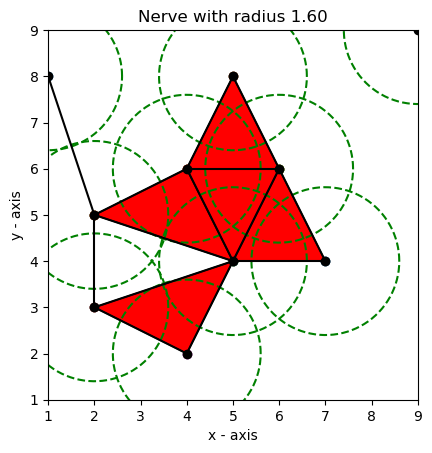

In [207]:
plot_nerve(x,y,1.6)

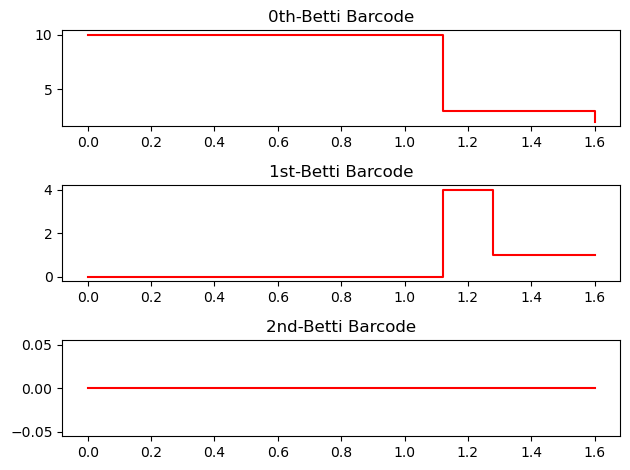

In [208]:
bar_code(x,y,1.6)

In [71]:
np.arange(0,1.6+1/10,1.6/10).tolist()

[0.0, 0.16, 0.32, 0.48, 0.64, 0.8, 0.96, 1.12, 1.28, 1.44, 1.6]

In [113]:
v1 = np.array([[1],[1],[0]])
v2 = np.array([[2],[2],[0]])
v3 = np.array([[0],[0],[0]])
matrix = np.hstack((v2-v1,v3-v1))
matrix

array([[ 1, -1],
       [ 1, -1],
       [ 0,  0]])

In [115]:
np.linalg.matrix_rank(matrix)

1

0th Betti number = 10


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

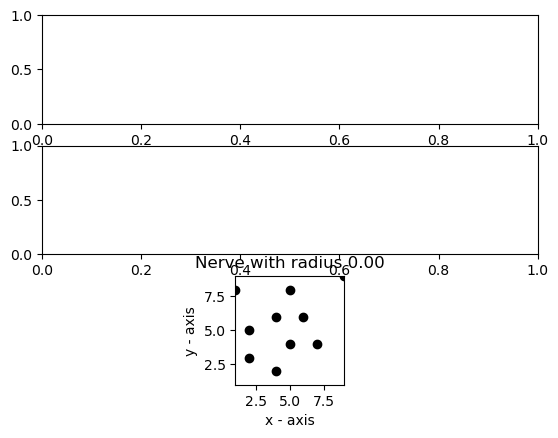

In [205]:
bar_code(x,y,1.6)

In [196]:
points = []
for i in range(len(x)):
    points.append([x[i],y[i]])
points

[[1, 8],
 [2, 5],
 [2, 3],
 [4, 2],
 [5, 4],
 [7, 4],
 [6, 6],
 [4, 6],
 [5, 8],
 [9, 9]]

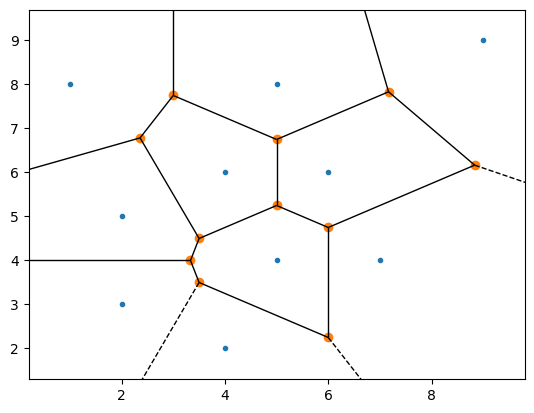

In [200]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [246]:
def slider_plot_nerve(r):
    x = [1,2,2,4,5,7,6,4,5,9]
    y = [8,5,3,2,4,4,6,6,8,9]
    max_dim = 0
    plt.plot(x,y, 'o', color = "black")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_Connected(x[i],x[j],y[i],y[j],r):
                one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                plt.scatter([x[i],x[j]],[y[i],y[j]])
                max_dim = 1
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                    two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                    point1 = [x[i], y[i]]
                    point2 = [x[j], y[j]]
                    point3 = [x[k], y[k]]
                    vertices = [point1, point2, point3]
                    plt.fill(*zip(*vertices), color='red', edgecolor='black', alpha = 0.2)
                    max_dim = 2
    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Nerve with radius %1.2f' % r)
    plt.xlim(1, 9)
    plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))

/var/folders/7_/2f8gr2ys3vl5f1cxpl8gvytc0000gn/T/ipykernel_19547/456894898.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  R = (a*b*c)/(4*A)


0th Betti number = 1
1st Betti number = 0
2nd Betti number = 81


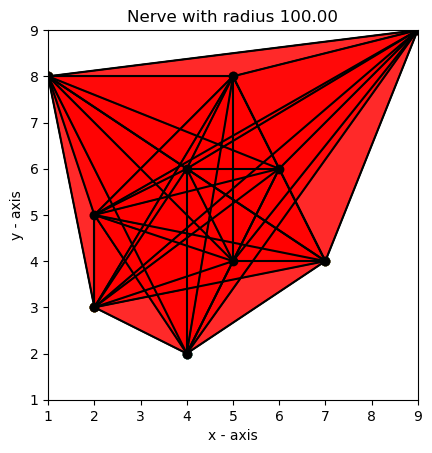

In [250]:
slider_plot_nerve(100)

In [249]:
interact(slider_plot_nerve, r=(1.8, 1.9, 0.01))
#interact(slider_plot_nerve, r=(1.8, 1.81, 0.001))

interactive(children=(FloatSlider(value=1.85, description='r', max=1.9, min=1.8, step=0.01), Output()), _dom_c…

<function __main__.slider_plot_nerve(r)>

In [ ]:
def slider_barcode(r):
    x = [1,2,2,4,5,7,6,4,5,9]
    y = [8,5,3,2,4,4,6,6,8,9]
    max_dim = 0
    plt.plot(x,y, 'o', color = "black")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_Connected(x[i],x[j],y[i],y[j],r):
                one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                plt.scatter([x[i],x[j]],[y[i],y[j]])
                max_dim = 1
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                    two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                    point1 = [x[i], y[i]]
                    point2 = [x[j], y[j]]
                    point3 = [x[k], y[k]]
                    vertices = [point1, point2, point3]
                    plt.fill(*zip(*vertices), color='red', edgecolor='black')
                    max_dim = 2
    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Nerve with radius %1.2f' % r)
    plt.xlim(1, 9)
    plt.ylim(1, 9)
    #plt.show()
    
   # for i in range(max_dim + 1):
   #     if i == 0:
   #         print("0th Betti number = {}".format(betti(sc,i)))
   #     if i == 1:
   #         print("1st Betti number = {}".format(betti(sc,i)))
   #     if i == 2:
   #         print("2nd Betti number = {}".format(betti(sc,i)))

In [235]:
# rough draft for slider_barcode
def bar_code(r):
    x = [1,2,2,4,5,7,6,4,5,9]
    y = [8,5,3,2,4,4,6,6,8,9]
    plt.plot(x,y, 'o', color = "black")
    r_vals = np.arange(0,r+1/10,r/10).tolist()
    betti0_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti1_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti2_vals = [0]*len(np.arange(0,r+1/10,r/10))
    plot_circles(x,y,r)
    for l in range(len(r_vals)): # take 10 steps to get to r
        max_dim = 0
        zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
        one_simplices = []
        two_simplices = []
        for i in range(len(x)): 
            for j in range(i+1,len(x)): # checking for 1-simplices
                if is_Connected(x[i],x[j],y[i],y[j],r_vals[l]): 
                    one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                    plt.plot([x[i],x[j]],[y[i],y[j]], 'k-') # plot line
                    plt.scatter([x[i],x[j]],[y[i],y[j]])
                    max_dim = 1
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                for k in range(j+1, len(x)):
                    # before using circumradius check for colinearity
                    if not_colinear(x[i],x[j],x[k], y[i],y[j],y[k]):
                        if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r_vals[l]): # checking for 2-simplices
                            two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                            point1 = [x[i], y[i]]
                            point2 = [x[j], y[j]]
                            point3 = [x[k], y[k]]
                            vertices = [point1, point2, point3]
                            plt.fill(*zip(*vertices), color='red', edgecolor='black')
                            max_dim = 2
        simplices = zero_simplices + one_simplices + two_simplices
        sc = Simplicial_Complex(simplices)
        for i in range(max_dim + 1):
            if i == 0:
                betti0_vals[l] = betti(sc,i)
            if i == 1:
                betti1_vals[l] = betti(sc,i)
            if i == 2:
                betti2_vals[l] = betti(sc,i)

    #print(r_vals)
    #print(betti0_vals)
    #print(betti1_vals)
    #print(betti2_vals)

    figure, axis = plt.subplots(3, 1)
    
    # Plot Nerve in middle of first column
    
    #axis[0,1].plot

    # For 0th-Betti Number
    axis[0].step(r_vals,betti0_vals, 'r-', where='post')
    axis[0].set_title("0th-Betti Barcode")

    # For 1st-Betti Number
    axis[1].step(r_vals, betti1_vals, 'r-', where='post')
    axis[1].set_title("1st-Betti Barcode")

    # For 2nd-Betti Number
    axis[2].step(r_vals, betti2_vals, 'r-', where='post')
    axis[2].set_title("2nd-Betti Barcode")
    
    # Rest of plots are empty

    # tighten layout so no overlap
    plt.tight_layout()

    # Combine all the operations and display
    #plt.show()
    #plt.step(r_vals, betti0_vals, 'r-', where='post')
    #plt.step(r_vals, betti1_vals, 'r-', where='post')
    #plt.step(r_vals, betti2_vals, 'r-', where='post')
    plt.show()

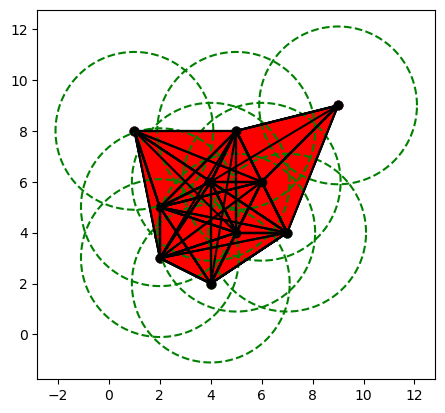

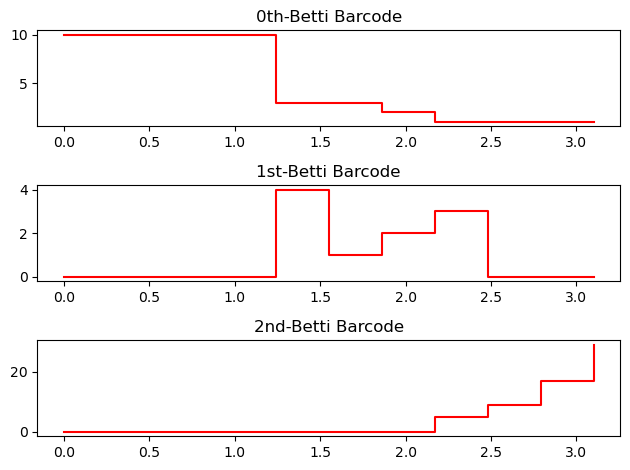

In [238]:
bar_code(3.1)

In [245]:
interact(bar_code, r=(0, 5, 0.1))

interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.bar_code(r)>

## Before Alpha: Taking into account tetrahedron

In [279]:
z = [1,0,0, 2, 3, 5, 4, 8, 7, 6]

def is_Connected3D(x1,x2,y1,y2,z1,z2,r):
    dist = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    if dist <= 2*r:
        return True
    else:
        return False
    
def circumRadius(x1,x2,x3,y1,y2,y3,z1,z2,z3,r):
    a = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
    b = np.sqrt((x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
    c = np.sqrt((x1-x3)**2 + (y1-y3)**2 + (z1-z3)**2)
    # Heron's theorem to calculate area of triangle
    s = (a+b+c)/2
    A = np.sqrt(s*(s-a)*(s-b)*(s-c))
    # circumradius is equal to (a*b*c)/4A
    #print(a)
    #print(b)
    #print(c)
    #print(s)
    #print(A)
    #print()
    R = (a*b*c)/(4*A)
    return R
    
    
# the 3 same conditions must follow in addition to the circumradius being less than r, so must create circumradius
# function
def is_Triangle3D(x1,x2,x3,y1,y2,y3,z1,z2,z3,r):
    if is_Connected3D(x1,x2,y1,y2,z1,z2,r) and is_Connected3D(x1,x3,y1,y3,z1,z3,r) and is_Connected3D(x2,x3,y2,y3,z2,z3,r):
        if circumRadius(x1,x2,x3,y1,y2,y3,z1,z2,z3,r) <= r:
            return True
    else:
        return False

def is_Tetrahedron()
    


def not_colinear3D(x1,x2,x3, y1,y2,y3, z1,z2,z3): # vectors and nullity
    v1 = np.array([[x1],[y1],[z1]])
    v2 = np.array([[x2],[y2],[z2]])
    v3 = np.array([[x3],[y3],[z3]])
    matrix = np.hstack((v2-v1,v3-v1))
    if np.linalg.matrix_rank(matrix) == 2:
        return True
    
def not_colinear_4_points(x1,x2,x3,x4 y1,y2,y3,y4, z1,z2,z3,z4):
    v1 = np.array([[x1],[y1],[z1]])
    v2 = np.array([[x2],[y2],[z2]])
    v3 = np.array([[x3],[y3],[z3]])
    v4 = np.array([[x4],[y4],[z4]])
    matrix = np.hstack((v2-v1,v3-v1,v4-v1))

def bar_code3D(x,y,z,r): # can also add number of steps parameter; moreover should just take it from birth to death
    r_vals = np.arange(0,r+1/10,r/10).tolist()
    betti0_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti1_vals = [0]*len(np.arange(0,r+1/10,r/10))
    betti2_vals = [0]*len(np.arange(0,r+1/10,r/10))
    for l in range(len(r_vals)): # take 10 steps to get to r
        max_dim = 0
        zero_simplices =[Simplex([(x[i],y[i],z[i])]) for i in range(len(x))] # list of 1-simplices
        one_simplices = []
        two_simplices = []
        for i in range(len(x)): 
            for j in range(i+1,len(x)):
                if is_Connected3D(x[i],x[j],y[i],y[j],z[i],z[j], r_vals[l]): # new radius is r_vals[l]
                    one_simplices.append(Simplex([(x[i],y[i],z[i]),(x[j],y[j],z[j])]))
                    max_dim = 1
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                for k in range(j+1, len(x)):
                    # before using circumradius check for colinearity
                    if not_colinear3D(x[i],x[j],x[k], y[i],y[j],y[k], z[i],z[j],z[k]):
                        if is_Triangle3D(x[i],x[j],x[k], y[i],y[j],y[k], z[i],z[j],z[k], r_vals[l]): # new radius is r_vals[l]
                            two_simplices.append(Simplex([(x[i],y[i],z[i]),(x[j],y[j],z[j]),(x[k],y[k],z[k])]))
                            max_dim = 2
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                for k in range(j+1, len(x)):
                    for l in range(k+1, len(x)):
                        # check for colinearity
                        
        simplices = zero_simplices + one_simplices + two_simplices
        sc = Simplicial_Complex(simplices)
        for i in range(max_dim + 1):
            if i == 0:
                betti0_vals[l] = betti(sc,i)
            if i == 1:
                betti1_vals[l] = betti(sc,i)
            if i == 2:
                betti2_vals[l] = betti(sc,i)
                
    print(r_vals)
    print(betti0_vals)
    print(betti1_vals)
    print(betti2_vals)


In [284]:
bar_code3D(x,y,z,3)

[0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998, 2.1, 2.4, 2.6999999999999997, 3.0]
[10, 10, 10, 10, 9, 4, 3, 2, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5]


In [281]:
r

0.6

# Psuedo Alpha Complex Betti Number

In [497]:
def is_ridge(x1,x2,y1,y2):
    a = (vor.points == [x1,y1]).tolist().index([True, True])
    b = (vor.points == [x2,y2]).tolist().index([True, True]) 
    # check if ridge exists between the points (i.e. if [a,b] or [b,a] in vor.ridge_points.tolist())
    if [a,b] in vor.ridge_points.tolist() or [b,a] in vor.ridge_points.tolist():
        return True

In [498]:
def plot_alpha(x,y,r):
    points = []
    for i in range(len(x)):
        points.append([x[i],y[i]])
    vor = Voronoi(points)
    fig = voronoi_plot_2d(vor)
    plt.show()
    max_dim = 0
    plt.plot(x,y, 'o', color = "teal")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_Connected(x[i],x[j],y[i],y[j],r) and is_ridge(x[i],x[j],y[i],y[j]):
                one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                #plt.scatter([x[i],x[j]],[y[i],y[j]])
                max_dim = 1
    # for filling triangles who the sets of the 3 points intersect
    #for i in range(len(x)):
    #    for j in range(i+1, len(x)):
    #        for k in range(j+1, len(x)):
    #            if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
    #                two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
    #                point1 = [x[i], y[i]]
    #                point2 = [x[j], y[j]]
    #                point3 = [x[k], y[k]]
    #                vertices = [point1, point2, point3]
    #                plt.fill(*zip(*vertices), color='red', edgecolor='black')
    #                max_dim = 2
    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    #plt.xlabel('x - axis')
    #plt.ylabel('y - axis')
    #plt.title('Nerve with radius %1.2f' % r)
    #plt.xlim(1, 9)
    #plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))

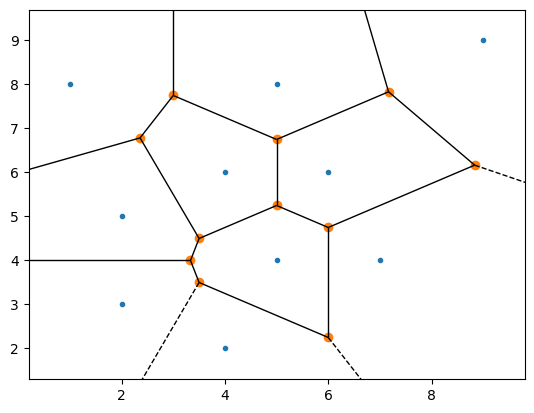

0th Betti number = 1
1st Betti number = 13


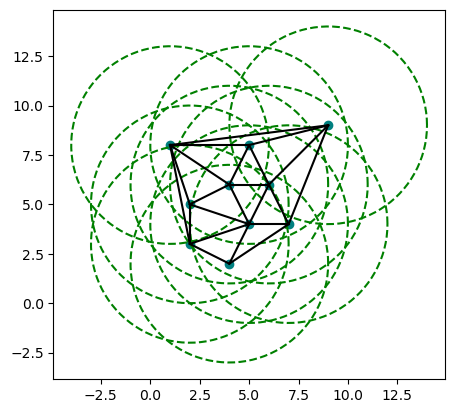

In [420]:
plot_alpha(x,y,5)

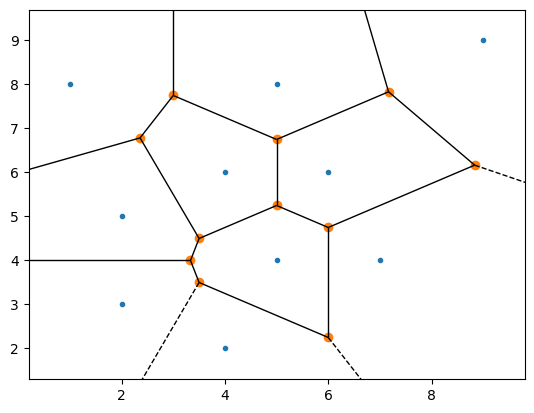

array([[9, 0],
       [9, 8],
       [9, 6],
       [9, 5],
       [8, 0],
       [8, 6],
       [8, 7],
       [0, 2],
       [0, 7],
       [0, 1],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 3],
       [4, 2],
       [4, 1],
       [5, 6],
       [5, 3],
       [6, 7],
       [7, 1],
       [3, 2],
       [2, 1]], dtype=int32)

In [258]:
#points = []
#for i in range(len(x)):
#    points.append([x[i],y[i]])
#points

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()
vor.ridge_points

In [427]:
print(vor.points)
print(vor.vertices)
print(vor.ridge_points)
#print(vor.ridge_vertices)

[[1. 8.]
 [2. 5.]
 [2. 3.]
 [4. 2.]
 [5. 4.]
 [7. 4.]
 [6. 6.]
 [4. 6.]
 [5. 8.]
 [9. 9.]]
[[ 3.         24.5       ]
 [ 7.16666667  7.83333333]
 [ 8.83333333  6.16666667]
 [ 5.          6.75      ]
 [ 3.          7.75      ]
 [-6.          4.        ]
 [ 2.35714286  6.78571429]
 [ 6.          4.75      ]
 [ 5.          5.25      ]
 [ 6.          2.25      ]
 [ 3.5         3.5       ]
 [ 3.5         4.5       ]
 [ 3.33333333  4.        ]]
[[9 0]
 [9 8]
 [9 6]
 [9 5]
 [8 0]
 [8 6]
 [8 7]
 [0 2]
 [0 7]
 [0 1]
 [4 5]
 [4 6]
 [4 7]
 [4 3]
 [4 2]
 [4 1]
 [5 6]
 [5 3]
 [6 7]
 [7 1]
 [3 2]
 [2 1]]


## Torus Simplicial Complex

In [428]:
torus = [Simplex([1]),Simplex([1,1]),Simplex([1,1]),Simplex([1,1]),Simplex([1,1,1]),Simplex([1,1,1])]
torus_complex = Simplicial_Complex(torus)
print(betti(torus_complex,0))
print(betti(torus_complex,1))
print(betti(torus_complex,2))

1
2
1


In [432]:
troys_doubt = [[1], [2], [3], [4], [1,2],[1,3],[1,4],[2,3],[2,4], [3,4], [1,2,3], [1,2,4]]
sc = Simplicial_Complex([Simplex(simplex) for simplex in troys_doubt])
for i in range(3):
    print(betti(sc,i))

1
1
0


# Alpha Complex Betti Number

In [434]:
def is_ridge(x1,x2,y1,y2):
    a = (vor.points == [x1,y1]).tolist().index([True, True])
    b = (vor.points == [x2,y2]).tolist().index([True, True]) 
    # check if ridge exists between the points (i.e. if [a,b] or [b,a] in vor.ridge_points.tolist())
    if [a,b] in vor.ridge_points.tolist() or [b,a] in vor.ridge_points.tolist():
        return True

Should first check if there's a ridge, then if their balls intersection contains the ridge vertex

In [ ]:
def plot_alpha(x,y,r):
    points = []
    for i in range(len(x)):
        points.append([x[i],y[i]])
    vor = Voronoi(points)
    fig = voronoi_plot_2d(vor)
    plt.show()
    max_dim = 0
    plt.plot(x,y, 'o', color = "teal")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_Connected(x[i],x[j],y[i],y[j],r) and is_ridge(x[i],x[j],y[i],y[j]):
                one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                #plt.scatter([x[i],x[j]],[y[i],y[j]])
                max_dim = 1
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                    two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                    point1 = [x[i], y[i]]
                    point2 = [x[j], y[j]]
                    point3 = [x[k], y[k]]
                    vertices = [point1, point2, point3]
                    plt.fill(*zip(*vertices), color='red', edgecolor='black')
                    max_dim = 2
    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    #plt.xlabel('x - axis')
    #plt.ylabel('y - axis')
    #plt.title('Nerve with radius %1.2f' % r)
    #plt.xlim(1, 9)
    #plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))

In [438]:
#print(vor.points) # just the points inputted to create voronoi region
print(vor.vertices) # Coordinates of the Voronoi vertices
#print(vor.ridge_points) # points (indices of points) that have a ridge
#print(vor.ridge_vertices)

[[ 3.         24.5       ]
 [ 7.16666667  7.83333333]
 [ 8.83333333  6.16666667]
 [ 5.          6.75      ]
 [ 3.          7.75      ]
 [-6.          4.        ]
 [ 2.35714286  6.78571429]
 [ 6.          4.75      ]
 [ 5.          5.25      ]
 [ 6.          2.25      ]
 [ 3.5         3.5       ]
 [ 3.5         4.5       ]
 [ 3.33333333  4.        ]]


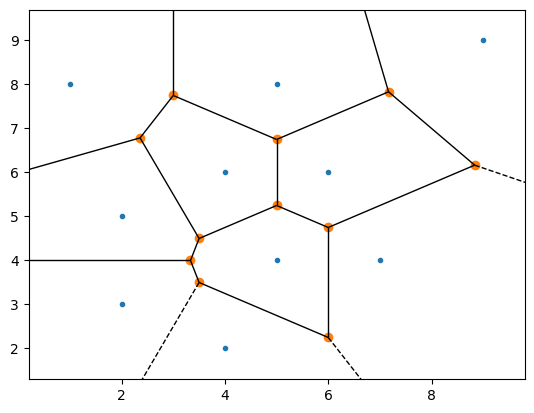

array([[ 3.        , 24.5       ],
       [ 7.16666667,  7.83333333],
       [ 8.83333333,  6.16666667],
       [ 5.        ,  6.75      ],
       [ 3.        ,  7.75      ],
       [-6.        ,  4.        ],
       [ 2.35714286,  6.78571429],
       [ 6.        ,  4.75      ],
       [ 5.        ,  5.25      ],
       [ 6.        ,  2.25      ],
       [ 3.5       ,  3.5       ],
       [ 3.5       ,  4.5       ],
       [ 3.33333333,  4.        ]])

In [441]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()
vor.vertices
#vor.ridge_vertices

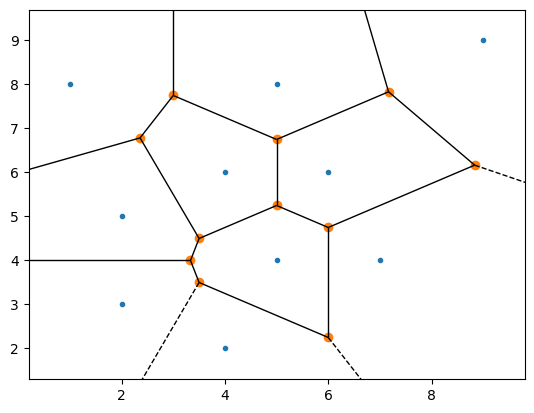

[[1. 8.]
 [2. 5.]
 [2. 3.]
 [4. 2.]
 [5. 4.]
 [7. 4.]
 [6. 6.]
 [4. 6.]
 [5. 8.]
 [9. 9.]]

[[9 0]
 [9 8]
 [9 6]
 [9 5]
 [8 0]
 [8 6]
 [8 7]
 [0 2]
 [0 7]
 [0 1]
 [4 5]
 [4 6]
 [4 7]
 [4 3]
 [4 2]
 [4 1]
 [5 6]
 [5 3]
 [6 7]
 [7 1]
 [3 2]
 [2 1]]

[[-1, 0, 1, 2], [], [4, 0, 1, 3], [6, 4, 0, -1, 5], [12, 10, 9, 7, 8, 11], [9, -1, 2, 7], [8, 3, 1, 2, 7], [11, 6, 4, 3, 8], [10, -1, 9], [12, 5, -1, 10], [12, 5, 6, 11]]


[[ 3.         24.5       ]
 [ 7.16666667  7.83333333]
 [ 8.83333333  6.16666667]
 [ 5.          6.75      ]
 [ 3.          7.75      ]
 [-6.          4.        ]
 [ 2.35714286  6.78571429]
 [ 6.          4.75      ]
 [ 5.          5.25      ]
 [ 6.          2.25      ]
 [ 3.5         3.5       ]
 [ 3.5         4.5       ]
 [ 3.33333333  4.        ]]

[[-1, 0], [0, 1], [1, 2], [-1, 2], [0, 4], [1, 3], [3, 4], [-1, 5], [4, 6], [5, 6], [7, 9], [7, 8], [8, 11], [9, 10], [10, 12], [11, 12], [2, 7], [-1, 9], [3, 8], [6, 11], [-1, 10], [5, 12]]


<function print>

In [460]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()
print(vor.points)
print()
print(vor.ridge_points)
print()
print(vor.regions)
print()
#print(vor.regions[0][0]) # corresponds to vor.regions[0]
#print(vor.regions[1][0]) # corresponds to vor.regions[1]
#print(vor.regions[2][0]) # corresponds to vor.regions[2]
print()
print(vor.vertices)
print()
print(vor.ridge_vertices)

In [487]:
def dist(x1,y1,x2,y2):
    a = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return a

In [488]:
print(vor.points)
print(vor.points.tolist().index([1,8]))
print()
print(vor.ridge_points)
[1,7] in vor.ridge_points.tolist() or [7,1] in vor.ridge_points.tolist()
#vor.ridge_points.tolist().index([1,7])
vor.ridge_points.tolist().index([7,1])
print()
print(vor.vertices)
print()
print(vor.ridge_vertices)

[[1. 8.]
 [2. 5.]
 [2. 3.]
 [4. 2.]
 [5. 4.]
 [7. 4.]
 [6. 6.]
 [4. 6.]
 [5. 8.]
 [9. 9.]]
0

[[9 0]
 [9 8]
 [9 6]
 [9 5]
 [8 0]
 [8 6]
 [8 7]
 [0 2]
 [0 7]
 [0 1]
 [4 5]
 [4 6]
 [4 7]
 [4 3]
 [4 2]
 [4 1]
 [5 6]
 [5 3]
 [6 7]
 [7 1]
 [3 2]
 [2 1]]

[[ 3.         24.5       ]
 [ 7.16666667  7.83333333]
 [ 8.83333333  6.16666667]
 [ 5.          6.75      ]
 [ 3.          7.75      ]
 [-6.          4.        ]
 [ 2.35714286  6.78571429]
 [ 6.          4.75      ]
 [ 5.          5.25      ]
 [ 6.          2.25      ]
 [ 3.5         3.5       ]
 [ 3.5         4.5       ]
 [ 3.33333333  4.        ]]

[[-1, 0], [0, 1], [1, 2], [-1, 2], [0, 4], [1, 3], [3, 4], [-1, 5], [4, 6], [5, 6], [7, 9], [7, 8], [8, 11], [9, 10], [10, 12], [11, 12], [2, 7], [-1, 9], [3, 8], [6, 11], [-1, 10], [5, 12]]


In [495]:
def intersection(lst1, lst2, lst3):
    return list(set(lst1) & set(lst2) & set(lst3))
intersection([-1,1],[-1,1],[-1,1])

[1, -1]

In [527]:
def new_plot_alpha(x,y,r):
    points = []
    for i in range(len(x)):
        points.append([x[i],y[i]])
    vor = Voronoi(points)
    fig = voronoi_plot_2d(vor)
    plt.show()
    max_dim = 0
    plt.plot(x,y, 'o', color = "teal")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_ridge(x[i],x[j],y[i],y[j]):
                # it says the ridge exist, but what is the index of the ridge
                pt1_index = vor.points.tolist().index([x[i], y[i]])
                pt2_index = vor.points.tolist().index([x[j], y[j]])
                if [pt1_index,pt2_index] in vor.ridge_points.tolist():
                    ridge_pt1_index = vor.ridge_points.tolist().index([pt1_index,pt2_index])
                elif [pt2_index, pt1_index] in vor.ridge_points.tolist():
                    ridge_pt1_index = vor.ridge_points.tolist().index([pt2_index,pt1_index])
                ridge_vertex1 = vor.ridge_vertices[ridge_pt1_index] # edge on both regions
                if -1 not in ridge_vertex1: # if has 2 vertices, can just check distance between pts <= 2r
                    if is_Connected(x[i],x[j],y[i],y[j],r):
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                elif ridge_vertex1.count(-1) == 1: # have to make sure distance from both points to verex <= r
                    #vertex_index = 0
                    for vertex_pt in ridge_vertex1:
                        if vertex_pt != -1: # get the element that's not -1, this will give index of vertex
                            vertex_index = vertex_pt
                    shared_vertex = vor.vertices.tolist()[vertex_index]
                    if dist(x[i],y[i],shared_vertex[0], shared_vertex[1]) <= r and dist(x[j],y[j],shared_vertex[0], shared_vertex[1]) <= r:
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                else: # if there's 2 -1s, meaning go forever both sides, should just be able to check dist <= 2r between 2 points
                    if is_Connected(x[i],x[j],y[i],y[j],r):
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                        
                    
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_ridge(x[i],x[j],y[i],y[j]) and is_ridge(x[i],x[k],y[i],y[k]) and is_ridge(x[j],x[k],y[j],y[k]):
                    pt1_index = vor.points.tolist().index([x[i], y[i]])
                    pt2_index = vor.points.tolist().index([x[j], y[j]])
                    pt3_index = vor.points.tolist().index([x[k], y[k]])

                    # getting ridge of pt1,pt2
                    if [pt1_index,pt2_index] in vor.ridge_points.tolist():
                        ridge_pt1_index = vor.ridge_points.tolist().index([pt1_index,pt2_index])
                    elif [pt2_index, pt1_index] in vor.ridge_points.tolist():
                        ridge_pt1_index = vor.ridge_points.tolist().index([pt2_index,pt1_index])
                    ridge_vertex1 = vor.ridge_vertices[ridge_pt1_index]
                    # getting ridge of pt1,pt3
                    if [pt1_index,pt3_index] in vor.ridge_points.tolist():
                        ridge_pt2_index = vor.ridge_points.tolist().index([pt1_index,pt3_index])
                    elif [pt3_index, pt1_index] in vor.ridge_points.tolist():
                        ridge_pt2_index = vor.ridge_points.tolist().index([pt3_index,pt1_index])
                    ridge_vertex2 = vor.ridge_vertices[ridge_pt2_index]
                    # getting ridge of pt2,pt3
                    if [pt2_index,pt3_index] in vor.ridge_points.tolist():
                        ridge_pt3_index = vor.ridge_points.tolist().index([pt2_index,pt3_index])
                    elif [pt3_index, pt2_index] in vor.ridge_points.tolist():
                        ridge_pt3_index = vor.ridge_points.tolist().index([pt3_index,pt2_index])
                    ridge_vertex3 = vor.ridge_vertices[ridge_pt3_index]

                    ridge_intersection = intersection(ridge_vertex1,ridge_vertex2,ridge_vertex3)
                    if len(ridge_intersection) == 0: # no intersection
                        continue
                    else:
                        #if -1 in ridge_intersection:
                        for index in ridge_intersection: # either a single number [a] or [-1,a]/[a,-1]
                            if index != -1:
                                shared_index = index
                        shared_vertex = vor.vertices.tolist()[shared_index]
                    # now just have to make sure dist from all points to shared vertex <= r to make triangle
                    if dist(x[i],y[i],shared_vertex[0], shared_vertex[1]) <= r and dist(x[j],y[j],shared_vertex[0], shared_vertex[1]) <= r and dist(x[k],y[k],shared_vertex[0], shared_vertex[1]):
                        #if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                        two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                        point1 = [x[i], y[i]]
                        point2 = [x[j], y[j]]
                        point3 = [x[k], y[k]]
                        vertices = [point1, point2, point3]
                        plt.fill(*zip(*vertices), color='red', edgecolor='black')
                        max_dim = 2

    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    #plt.xlabel('x - axis')
    #plt.ylabel('y - axis')
    #plt.title('Nerve with radius %1.2f' % r)
    #plt.xlim(1, 9)
    #plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))

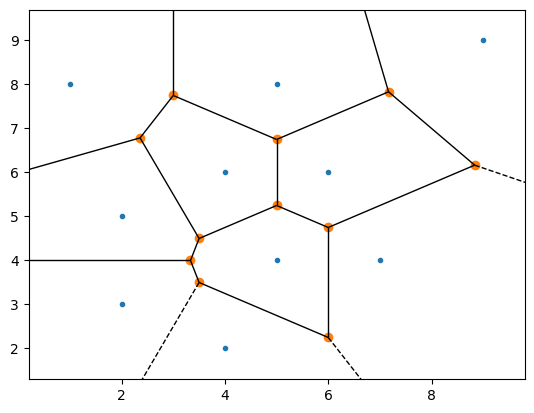

0th Betti number = 2
1st Betti number = 6


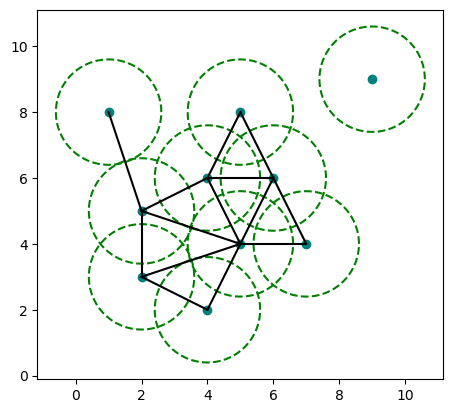

In [528]:
plot_alpha(x,y,1.6)

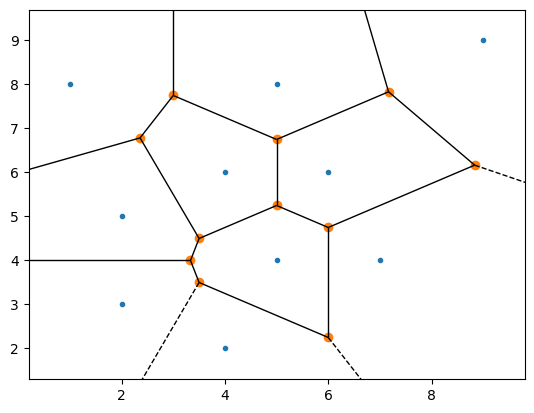

0th Betti number = 1
1st Betti number = 0
2nd Betti number = 0


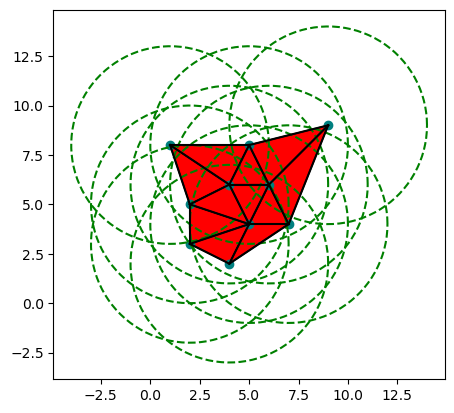

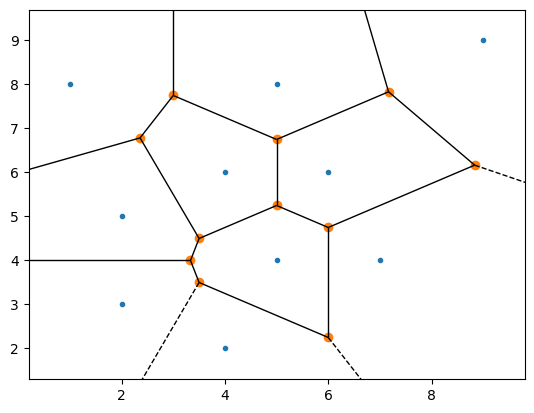

0th Betti number = 2
1st Betti number = 1
2nd Betti number = 0


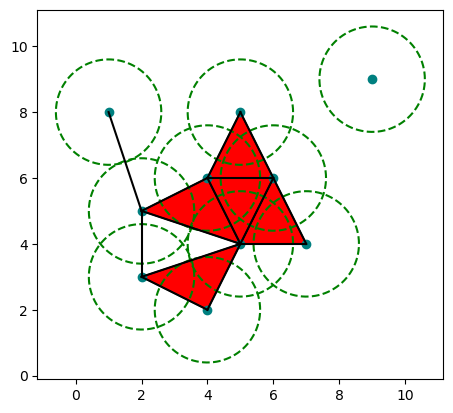

In [533]:
new_plot_alpha(x,y,5)
new_plot_alpha(x,y,1.6)

In [544]:
def slider_alpha(r):
    x = [1,2,2,4,5,7,6,4,5,9]
    y = [8,5,3,2,4,4,6,6,8,9]
    points = []
    for i in range(len(x)):
        points.append([x[i],y[i]])
    vor = Voronoi(points)
    fig = voronoi_plot_2d(vor)
    #plt.show()
    max_dim = 0
    plt.plot(x,y, 'o', color = "teal")
    zero_simplices =[Simplex([(x[i],y[i])]) for i in range(len(x))] # list of 1-simplices
    one_simplices = []
    two_simplices = []
    plot_circles(x,y,r)
    # for plotting lines connecting points whose sets intersect
    for i in range(len(x)): 
        for j in range(i+1,len(x)):
            if is_ridge(x[i],x[j],y[i],y[j]):
                # it says the ridge exist, but what is the index of the ridge
                pt1_index = vor.points.tolist().index([x[i], y[i]])
                pt2_index = vor.points.tolist().index([x[j], y[j]])
                if [pt1_index,pt2_index] in vor.ridge_points.tolist():
                    ridge_pt1_index = vor.ridge_points.tolist().index([pt1_index,pt2_index])
                elif [pt2_index, pt1_index] in vor.ridge_points.tolist():
                    ridge_pt1_index = vor.ridge_points.tolist().index([pt2_index,pt1_index])
                ridge_vertex1 = vor.ridge_vertices[ridge_pt1_index] # edge on both regions
                if -1 not in ridge_vertex1: # if has 2 vertices, can just check distance between pts <= 2r
                    if is_Connected(x[i],x[j],y[i],y[j],r):
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                elif ridge_vertex1.count(-1) == 1: # have to make sure distance from both points to verex <= r
                    #vertex_index = 0
                    for vertex_pt in ridge_vertex1:
                        if vertex_pt != -1: # get the element that's not -1, this will give index of vertex
                            vertex_index = vertex_pt
                    shared_vertex = vor.vertices.tolist()[vertex_index]
                    if dist(x[i],y[i],shared_vertex[0], shared_vertex[1]) <= r and dist(x[j],y[j],shared_vertex[0], shared_vertex[1]) <= r:
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                else: # if there's 2 -1s, meaning go forever both sides, should just be able to check dist <= 2r between 2 points
                    if is_Connected(x[i],x[j],y[i],y[j],r):
                        one_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j])]))
                        plt.plot([x[i],x[j]],[y[i],y[j]], 'k-')
                        #plt.scatter([x[i],x[j]],[y[i],y[j]])
                        max_dim = 1
                        
                    
    # for filling triangles who the sets of the 3 points intersect
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for k in range(j+1, len(x)):
                if is_ridge(x[i],x[j],y[i],y[j]) and is_ridge(x[i],x[k],y[i],y[k]) and is_ridge(x[j],x[k],y[j],y[k]):
                    pt1_index = vor.points.tolist().index([x[i], y[i]])
                    pt2_index = vor.points.tolist().index([x[j], y[j]])
                    pt3_index = vor.points.tolist().index([x[k], y[k]])

                    # getting ridge of pt1,pt2
                    if [pt1_index,pt2_index] in vor.ridge_points.tolist():
                        ridge_pt1_index = vor.ridge_points.tolist().index([pt1_index,pt2_index])
                    elif [pt2_index, pt1_index] in vor.ridge_points.tolist():
                        ridge_pt1_index = vor.ridge_points.tolist().index([pt2_index,pt1_index])
                    ridge_vertex1 = vor.ridge_vertices[ridge_pt1_index]
                    # getting ridge of pt1,pt3
                    if [pt1_index,pt3_index] in vor.ridge_points.tolist():
                        ridge_pt2_index = vor.ridge_points.tolist().index([pt1_index,pt3_index])
                    elif [pt3_index, pt1_index] in vor.ridge_points.tolist():
                        ridge_pt2_index = vor.ridge_points.tolist().index([pt3_index,pt1_index])
                    ridge_vertex2 = vor.ridge_vertices[ridge_pt2_index]
                    # getting ridge of pt2,pt3
                    if [pt2_index,pt3_index] in vor.ridge_points.tolist():
                        ridge_pt3_index = vor.ridge_points.tolist().index([pt2_index,pt3_index])
                    elif [pt3_index, pt2_index] in vor.ridge_points.tolist():
                        ridge_pt3_index = vor.ridge_points.tolist().index([pt3_index,pt2_index])
                    ridge_vertex3 = vor.ridge_vertices[ridge_pt3_index]

                    ridge_intersection = intersection(ridge_vertex1,ridge_vertex2,ridge_vertex3)
                    if len(ridge_intersection) == 0: # no intersection
                        continue
                    else:
                        #if -1 in ridge_intersection:
                        for index in ridge_intersection: # either a single number [a] or [-1,a]/[a,-1]
                            if index != -1:
                                shared_index = index
                        shared_vertex = vor.vertices.tolist()[shared_index]
                    # now just have to make sure dist from all points to shared vertex <= r to make triangle
                    if dist(x[i],y[i],shared_vertex[0], shared_vertex[1]) <= r and dist(x[j],y[j],shared_vertex[0], shared_vertex[1]) <= r and dist(x[k],y[k],shared_vertex[0], shared_vertex[1]):
                        #if is_Triangle(x[i],x[j],x[k], y[i],y[j],y[k],r):
                        two_simplices.append(Simplex([(x[i],y[i]),(x[j],y[j]),(x[k],y[k])]))
                        point1 = [x[i], y[i]]
                        point2 = [x[j], y[j]]
                        point3 = [x[k], y[k]]
                        vertices = [point1, point2, point3]
                        plt.fill(*zip(*vertices), color='red', edgecolor='black')
                        max_dim = 2

    
    simplices = zero_simplices + one_simplices + two_simplices
    sc = Simplicial_Complex(simplices)
                
                
    #plt.xlabel('x - axis')
    #plt.ylabel('y - axis')
    #plt.title('Nerve with radius %1.2f' % r)
    #plt.xlim(1, 9)
    #plt.ylim(1, 9)
    #plt.show()
    
    for i in range(max_dim + 1):
        if i == 0:
            print("0th Betti number = {}".format(betti(sc,i)))
        if i == 1:
            print("1st Betti number = {}".format(betti(sc,i)))
        if i == 2:
            print("2nd Betti number = {}".format(betti(sc,i)))

In [545]:
interact(slider_alpha, r = (0.1,17,0.1))

interactive(children=(FloatSlider(value=8.5, description='r', max=17.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.slider_alpha(r)>

In [452]:
import numpy as np
from scipy.spatial import Delaunay
arr_points = np.array(points)
tri = Delaunay(arr_points)

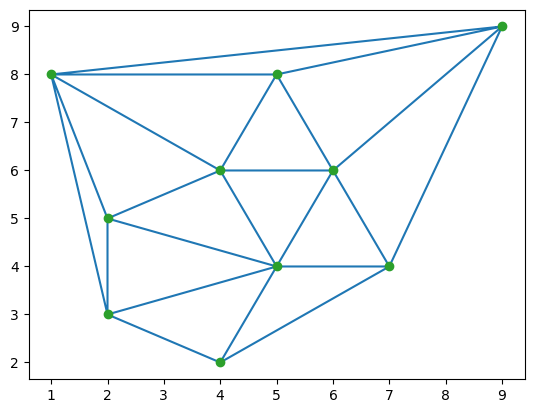

In [453]:
import matplotlib.pyplot as plt
plt.triplot(arr_points[:,0], arr_points[:,1], tri.simplices)
plt.plot(arr_points[:,0], arr_points[:,1], 'o')
plt.show()